<a href="https://colab.research.google.com/github/vishymails/Cybersecurity-june24/blob/main/Cybersecurity_june2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing Time Series using StatsModels

In [1]:
from random import random

In [2]:
time_series = [2 * x + random() for x in range(1, 100)]


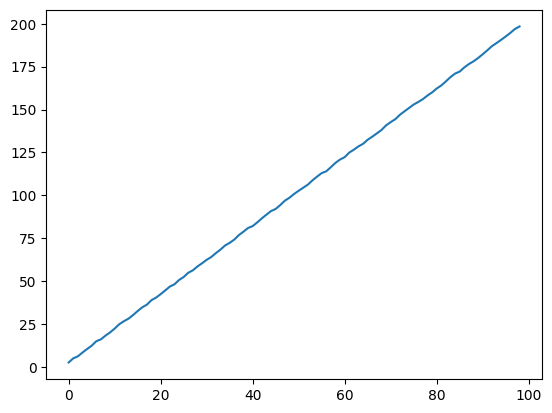

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time_series)
plt.show()


In [16]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(time_series, order=(0, 1, 2))
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))
print(y)

[199.25776731]


In [18]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(time_series, lags=2)
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))
print(y)



[200.59113312]


In [19]:
model_fit.summary


<bound method AutoRegResults.summary of <statsmodels.tsa.ar_model.AutoRegResults object at 0x7e4f93607640>>

In [20]:
model_fit.params

array([2.67830625, 0.65050609, 0.34965503])

In [21]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:                     AutoReg(2)   Log Likelihood                 -41.198
Method:               Conditional MLE   S.D. of innovations              0.370
Date:                Mon, 17 Jun 2024   AIC                             90.396
Time:                        11:02:33   BIC                            100.695
Sample:                             2   HQIC                            94.561
                                   99                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6783      0.205     13.071      0.000       2.277       3.080
y.L1           0.6505      0.096      6.802      0.000       0.463       0.838
y.L2           0.3497      0.096      3.655      0.000       0.162       0.537
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9999           +0.0000j            0.9999            0.0000
AR.2           -2.8603           +0.0000j            2.8603            0.5000
-----------------------------------------------------------------------------
"""

#Anomally Detection using Isolation Forest


In [22]:
import numpy as np
import pandas as pd

random_seed = np.random.RandomState(12)

In [23]:
X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train +  3, X_train]

X_train = pd.DataFrame(X_train, columns=['x', 'y'])

X_train.head()

,x,y
0,3.236493,2.659287
1,3.121220,2.149632
2,3.376571,2.232639
3,3.002564,2.939886
4,2.596509,4.435910


In [24]:
X_test = 0.5 * random_seed.randn(100, 2)
X_test = np.r_[X_test +  3, X_test]

X_test = pd.DataFrame(X_test, columns=['x', 'y'])

X_test.head()

,x,y
0,3.944575,3.866919
1,2.984853,3.142150
2,3.501735,2.168262
3,2.906300,3.233826
4,3.273225,3.261790


In [25]:
X_outliers = random_seed.uniform(low=-5, high=5, size=(50, 2))

X_outliers = pd.DataFrame(X_outliers, columns=['x', 'y'])

X_outliers.head()

,x,y
0,-1.560737,1.398251
1,-3.476082,-0.236852
2,-4.988811,0.156938
3,-1.826893,-1.609951
4,-1.012323,-4.031357


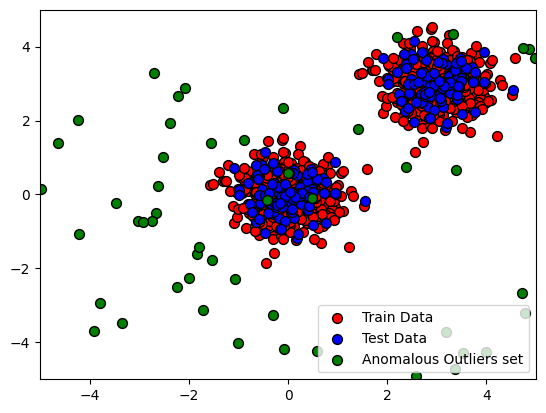

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(X_train['x'], X_train['y'], c='red', s =50, edgecolors='k')
p2 = plt.scatter(X_test['x'], X_test['y'], c='blue', s =50, edgecolors='k')
p3 = plt.scatter(X_outliers['x'], X_outliers['y'], c='green', s =50, edgecolors='k')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend([p1, p2, p3], ['Train Data', 'Test Data ', 'Anomalous Outliers set'], loc = "lower right")

plt.show()

In [28]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest()

clf.fit(X_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_outliers_pred = clf.predict(X_outliers)



In [29]:
X_outliers = X_outliers.assign(pred = y_outliers_pred)

X_outliers.head()

,x,y,pred
0,-1.560737,1.398251,-1
1,-3.476082,-0.236852,-1
2,-4.988811,0.156938,-1
3,-1.826893,-1.609951,-1
4,-1.012323,-4.031357,-1


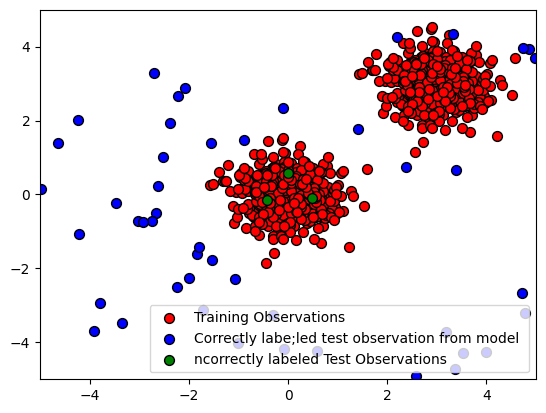

In [30]:
p1 = plt.scatter(X_train['x'], X_train['y'], c='red', s =50, edgecolors='k')
p2 = plt.scatter(X_outliers.loc[X_outliers.pred == -1, ['x']], X_outliers.loc[X_outliers.pred == -1, ['y']], c='blue', s =50, edgecolors='k')
p3 = plt.scatter(X_outliers.loc[X_outliers.pred == 1, ['x']], X_outliers.loc[X_outliers.pred == 1, ['y']], c='green', s =50, edgecolors='k')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend([p1, p2, p3], ['Training Observations', 'Correctly labeled test observation from model ', 'ncorrectly labeled Test Observations'], loc = "lower right")

plt.show()

# Standardizing your data - before processing

In [31]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/vishymails/Cybersecurity-june24/main/file_pe_headers.csv", sep=',')

data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [32]:
X = data.drop(["Name", "Malware"], axis=1)

X

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,23117,144,3,0,4,0,65535,0,184,0,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,23117,144,3,0,4,0,65535,0,184,0,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,23117,144,3,0,4,0,65535,0,184,0,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,23117,144,3,0,4,0,65535,0,184,0,...,3227516992,0,2,43,0,0,61440,73728,0,90624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,8,85,0,0,24948,28672,0,0
19607,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,10,391,0,0,1413420,1462272,0,18855424
19608,23117,0,0,0,0,0,0,0,0,0,...,3758096448,0,0,0,0,0,0,61440,0,0
19609,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,12,162,8,89008,94904,102400,0,0


In [33]:
X = data.drop(["Name", "Malware"], axis=1).to_numpy()

X

array([[2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 7.78240e+04,
        7.37280e+04, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 2.94912e+05,
        0.00000e+00, 3.46112e+05],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 4.09600e+04,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.31170e+04, 0.00000e+00, 0.00000e+00, ..., 6.14400e+04,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 1.02400e+05,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 5.57056e+05,
        0.00000e+00, 0.00000e+00]])

In [34]:
from sklearn.preprocessing import StandardScaler

X_standardized = StandardScaler()

X_standardized = X_standardized.fit_transform(X)

X_standardized

array([[ 0.        , -0.03506542, -0.04751096, ..., -0.07054894,
        -0.0198525 , -0.04066791],
       [ 0.        , -0.03506542, -0.04751096, ..., -0.03849221,
        -0.02110877, -0.02469983],
       [ 0.        , -0.03506542, -0.04751096, ..., -0.07599254,
        -0.02110877, -0.04066791],
       ...,
       [ 0.        , -0.18093613, -0.04958686, ..., -0.07296832,
        -0.02110877, -0.04066791],
       [ 0.        , -0.03506542, -0.04751096, ..., -0.06691988,
        -0.02110877, -0.04066791],
       [ 0.        , -0.03506542, -0.04751096, ...,  0.00021781,
        -0.02110877, -0.04066791]])

In [35]:
data.shape

(19611, 79)

In [36]:
data.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,...,4.294967e+09,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


In [37]:
data.drop(["Name", "Malware"], axis=1, inplace = True)

In [38]:
data.shape


(19611, 77)